In [60]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
# import dataset

dataset = pd.read_csv('/content/drive/MyDrive/Cloud Lab/Lab Experiments/Colab Notebooks/Part 2 -  Regression/4. Support Vector Regression/Position_Salaries.csv')

In [62]:
# splitting dataset into dependent variable and independent variable

X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [63]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [64]:
y = y.reshape(len(y),1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

In [65]:
# splitting dependent and independent variables data into train set and test set

# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [66]:
# print(X_train)

In [67]:
# print(X_test)

In [68]:
# print(y_train)

In [69]:
# print(y_test)

In [70]:
# scaling the both dependent and independent variables of the data with separate scaler objects

from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)


In [71]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [72]:
# train the model by using SVR

from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [73]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))


# why we using inverse_transform()=>  basic purpose is tranform scaling values into orginal dataframe values


array([[170370.0204065]])

In [74]:
# here we given input values is practical purpose only.
sc_y.inverse_transform([[2.64250325]])

array([[999999.99927707]])

In [75]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

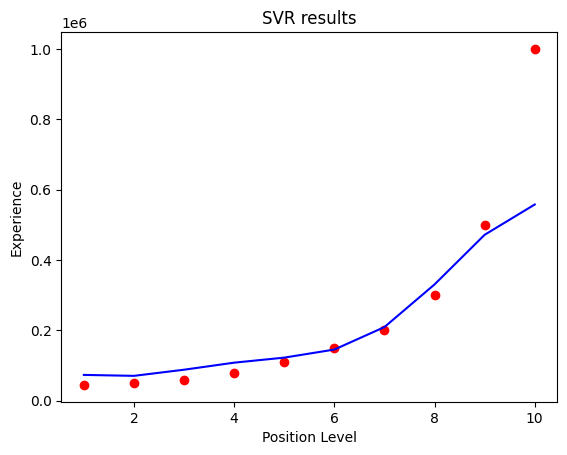

In [76]:
# lets visulaize the support vector regression results

plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)),color = 'blue')
plt.title('SVR results')
plt.xlabel('Position Level')
plt.ylabel('Experience')
plt.show()

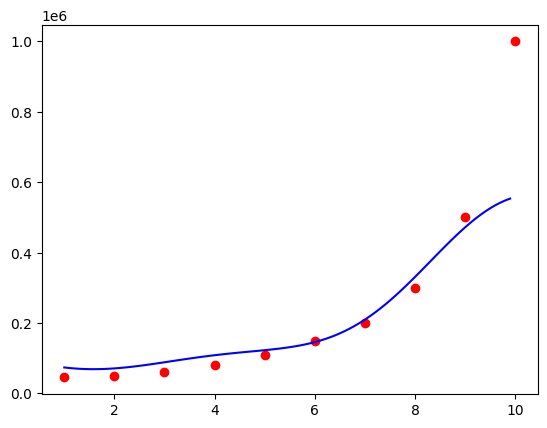

In [80]:
# visualize the svr results with high resolution smooth curve

X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)),0.1)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y) , color= 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)),color='blue')
# plt.title('SVR results in high resolution with smooth curve')
# plt.xlabel('Position Level')
# plt.ylabel('Salary')
plt.show()